<a href="https://colab.research.google.com/github/TetianaZabolotko/MLtrainings/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from PIL import Image
import numpy as np

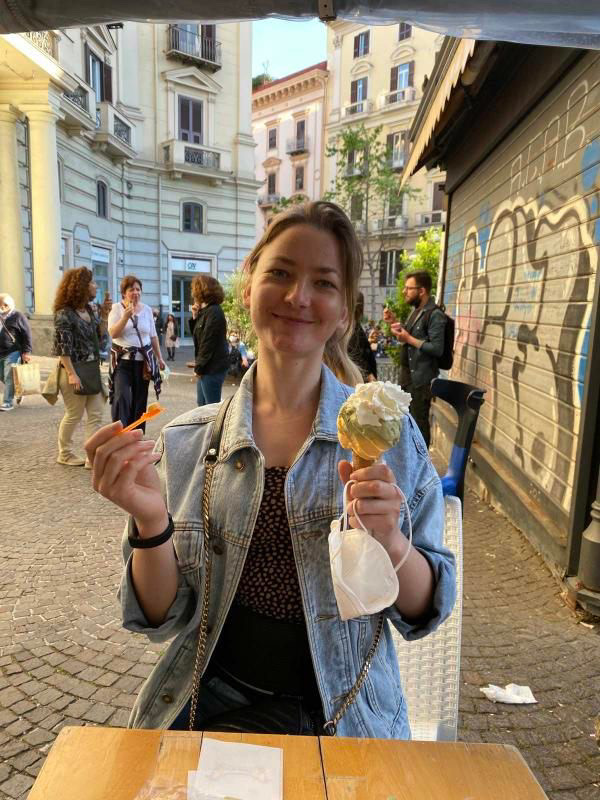

In [4]:
pil_im = Image.open('IMG_0238.JPG')
pil_im

In [12]:
im = np.array(Image.open('IMG_0238.JPG'))
print(im.shape, im.dtype)

(800, 600, 3) uint8


In [13]:
im = np.array(Image.open('IMG_0238.JPG').convert('L'),'f')
print(im.shape, im.dtype)

(800, 600) float32


In [16]:
value = im[2,3]

array([[195, 197, 198, ..., 173, 173, 173],
       [193, 196, 198, ..., 174, 174, 174],
       [191, 195, 198, ..., 174, 174, 174],
       ...,
       [118, 116, 152, ..., 160, 152, 142],
       [110, 113, 137, ..., 154, 146, 150],
       [101, 124, 131, ..., 165, 147, 153]], dtype=uint8)
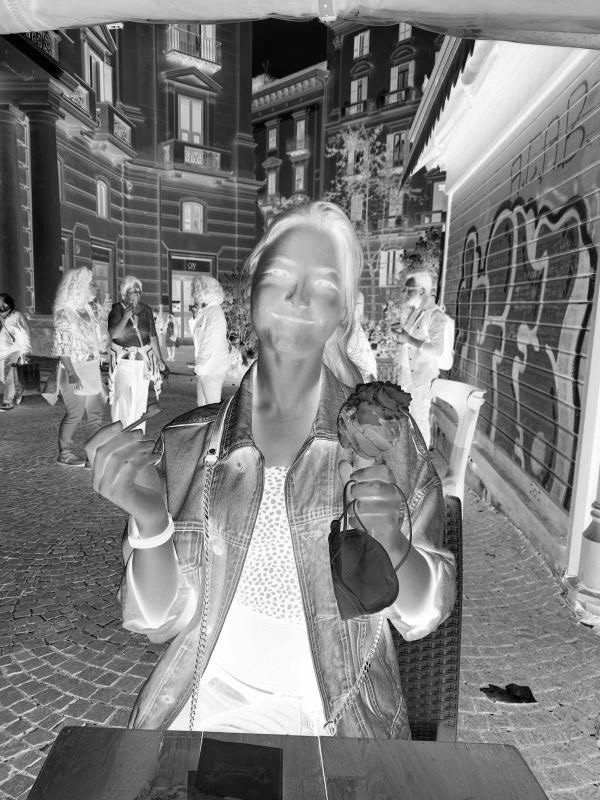

In [17]:
im = np.array(Image.open('IMG_0238.JPG').convert('L'))
im2 = 255 - im
im2

In [20]:
im3 = (100/255)*im + 100
im3

array([[123.52941176, 122.74509804, 122.35294118, ..., 132.15686275,
        132.15686275, 132.15686275],
       [124.31372549, 123.1372549 , 122.35294118, ..., 131.76470588,
        131.76470588, 131.76470588],
       [125.09803922, 123.52941176, 122.35294118, ..., 131.76470588,
        131.76470588, 131.76470588],
       ...,
       [153.7254902 , 154.50980392, 140.39215686, ..., 137.25490196,
        140.39215686, 144.31372549],
       [156.8627451 , 155.68627451, 146.2745098 , ..., 139.60784314,
        142.74509804, 141.17647059],
       [160.39215686, 151.37254902, 148.62745098, ..., 135.29411765,
        142.35294118, 140.        ]])

In [21]:
im4 = 255*(im/255)**2
im4

array([[14.11764706, 13.19215686, 12.74117647, ..., 26.36862745,
        26.36862745, 26.36862745],
       [15.0745098 , 13.65098039, 12.74117647, ..., 25.72941176,
        25.72941176, 25.72941176],
       [16.0627451 , 14.11764706, 12.74117647, ..., 25.72941176,
        25.72941176, 25.72941176],
       ...,
       [73.60392157, 75.76862745, 41.60392157, ..., 35.39215686,
        41.60392157, 50.0745098 ],
       [82.45098039, 79.0745098 , 54.60392157, ..., 40.00392157,
        46.59215686, 43.23529412],
       [93.00392157, 67.29803922, 60.29803922, ..., 31.76470588,
        45.74117647, 40.8       ]])

In [22]:
print(im.min(),im.max())

0 255
